# Pymaceuticals Inc.
---

### Analysis

There seems to be a strong correlation between mouse weight and tumor volume for the Capomulin Drug Regimen. The correlation value is 0.66. From the scatterplot for the Capomulin drug regimen there is a positive correlation between average tumor size and weight.

In the boxplot, there is an outlier for the Ibunifol drug.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
study_results_df = pd.DataFrame(study_results)
study_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_of_mice = len(study_results["Mouse ID"])
num_of_mice
print(f" There are {num_of_mice} mice in the study")


 There are 1893 mice in the study


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouping=study_results.groupby(["Mouse ID","Timepoint"]).count()
duplicate_mice=grouping.loc[grouping["Tumor Volume (mm3)"]>1,:]
duplicate_mice.index[0]


('g989', 0)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id =  study_results.loc[study_results["Mouse ID"] == "g989"]
duplicate_mice_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate = study_results_df[study_results_df['Mouse ID'] != "g989"]

clean_duplicate_df = pd.DataFrame(clean_duplicate)
clean_duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.

updated_count_mice = len(clean_duplicate["Mouse ID"].unique())
updated_count_mice
print(f" There are now {updated_count_mice} unique mice in the study")


 There are now 248 unique mice in the study


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen = clean_duplicate_df['Tumor Volume (mm3)'].groupby(clean_duplicate_df['Drug Regimen']).mean()
median_regimen = clean_duplicate_df['Tumor Volume (mm3)'].groupby(clean_duplicate_df['Drug Regimen']).median()
var_regimen = clean_duplicate_df['Tumor Volume (mm3)'].groupby(clean_duplicate_df['Drug Regimen']).var()
stdev_regimen = clean_duplicate_df['Tumor Volume (mm3)'].groupby(clean_duplicate_df['Drug Regimen']).std()
sem_regimen = clean_duplicate_df['Tumor Volume (mm3)'].groupby(clean_duplicate_df['Drug Regimen']).sem()



# Assemble the resulting series into a single summary DataFrame.
summary_stats_tumor_vol_df = pd.DataFrame
(
    {
        "Mean Tumor Volume":mean_regimen, 
        "Median Tumor Volume":median_regimen, 
        "Tumor Volume Variance":var_regimen, 
        "Tumor Volume Std. Dev.":stdev_regimen, 
        "Tumor Volume Std. Err.":sem_regimen
    }
)


summary_stats_tumor_vol_df





pandas.core.frame.DataFrame

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

summary_stats =  clean_duplicate_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_stats


# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Count of Mice tested in each Drug Regimen')

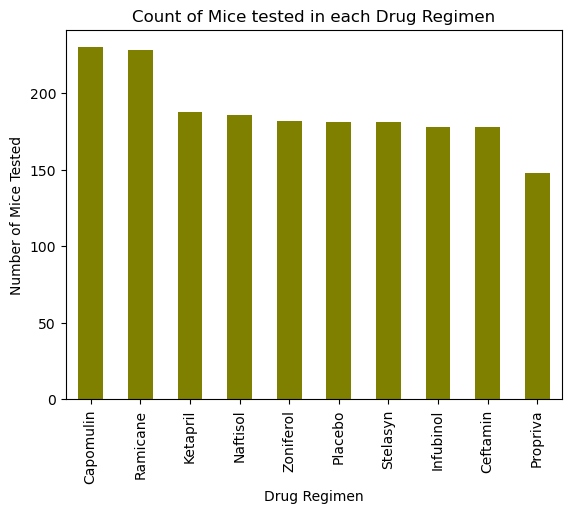

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

pandas_drug_plot= clean_duplicate_df["Drug Regimen"].value_counts()
pandas_chart = pandas_drug_plot.plot.bar(color='Olive') 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Count of Mice tested in each Drug Regimen")



Text(0, 0.5, 'Mice number tested')

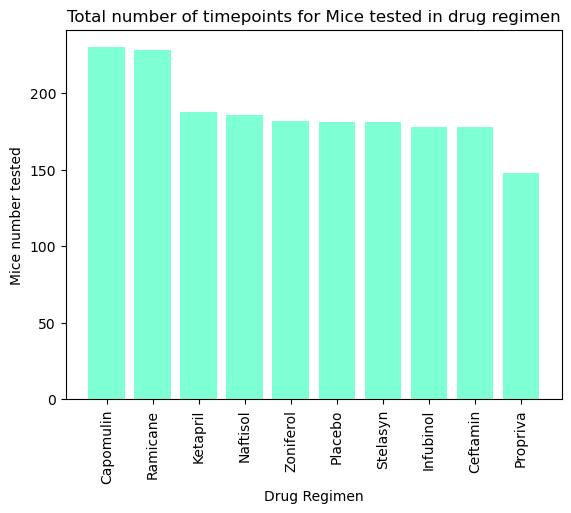

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pyplot_drug_plot = clean_duplicate_df["Drug Regimen"].value_counts()
x_axis = pyplot_drug_plot.index.values
y_axis = pyplot_drug_plot.values

plt.bar(pyplot_drug_plot.index.values, pyplot_drug_plot.values, color = "Aquamarine", alpha = 1)
plt.xticks(rotation=90)
plt.title("Total number of timepoints for Mice tested in drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice number tested")

<AxesSubplot:title={'center':'Comparing Female and Male Mice Distriution in Drug Trials'}, ylabel='Sex'>

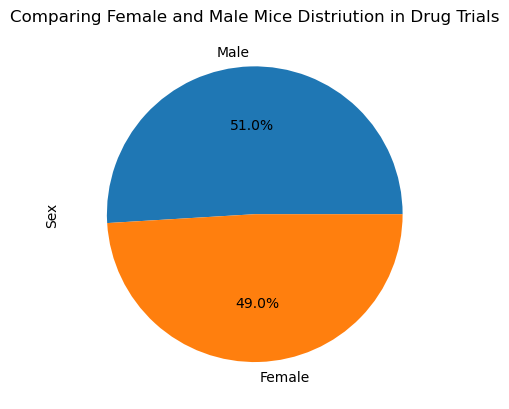

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

bio_sex = clean_duplicate["Sex"].value_counts()
plt.title ("Comparing Female and Male Mice Distriution in Drug Trials")
bio_sex.plot.pie(autopct = "%2.1f%%")


Text(0, 0.5, 'Sex')

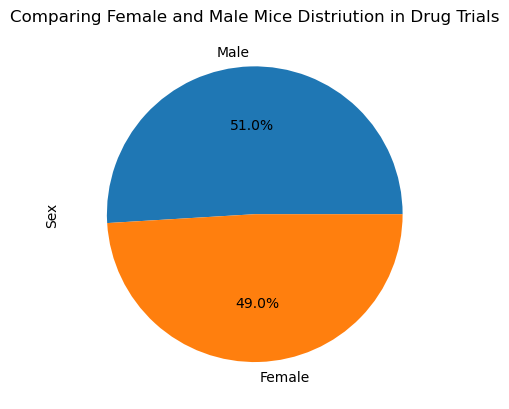

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ['Male', 'Female']
plt.pie(bio_sex.values, labels=sex, autopct="%1.1f%%")
plt.title('Comparing Female and Male Mice Distriution in Drug Trials')
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_tumor_volume = clean_duplicate_df[["Mouse ID", "Timepoint"]].groupby("Mouse ID").max().reset_index()
combined_df = final_tumor_volume.merge(clean_duplicate_df, how="left", on=["Mouse ID", "Timepoint"])
combined_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#print(f"Capomulin", "Ramicane", "Infubinol", "Ceftamin")

# Create empty list to fill with tumor vol data (for plotting)
tv_data_plotting = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_name:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_size = combined_df.loc[combined_df["Drug Regimen"]== treatment,"Tumor Volume (mm3)"]
    tv_data_plotting.append(tumor_size)
    
    # Determine outliers using upper and lower bounds
    treatment_outlier = tumor_size.quantile([.25,.5,.75])
    lowerq = treatment_outlier[0.25]
    upperq = treatment_outlier[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {treatment_outlier[0.5]} ")
     
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} for {treatment} could be outliers.")
    print(f"Values above {upper_bound} for {treatment} could be outliers.")
        
    outlier_treatment = tumor_size.loc[(tumor_size < lower_bound) | (tumor_size > upper_bound)]
    print(f"The outliers for {treatment} are: {outlier_treatment}")
    print('-------------------------------------------')
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
The outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
The outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interq

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3872ce8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3872cee80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3872ce610>,
 'medians': [<matplotlib.lines.Line2D at 0x1b3872e0460>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b3872e0a00>,
 'means': [<matplotlib.lines.Line2D at 0x1b3872e0730>,
  <matplotlib.lines.Line2D at 0x1b387311be0>]}

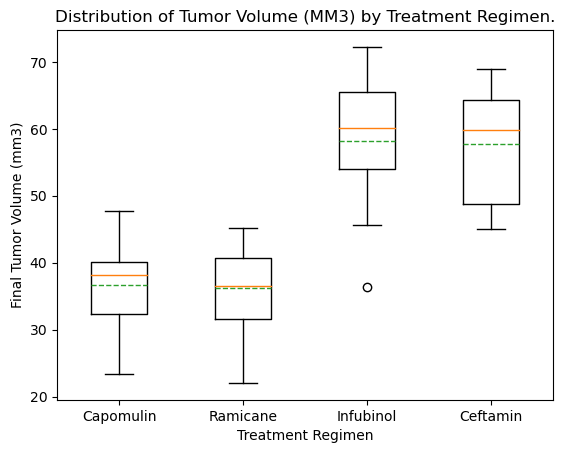

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_boxplot = treatment_name
fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of Tumor Volume (MM3) by Treatment Regimen.")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Treatment Regimen")
ax1.boxplot(tv_data_plotting,labels=tumor_boxplot, showmeans= True, meanline = True)



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm 3)')

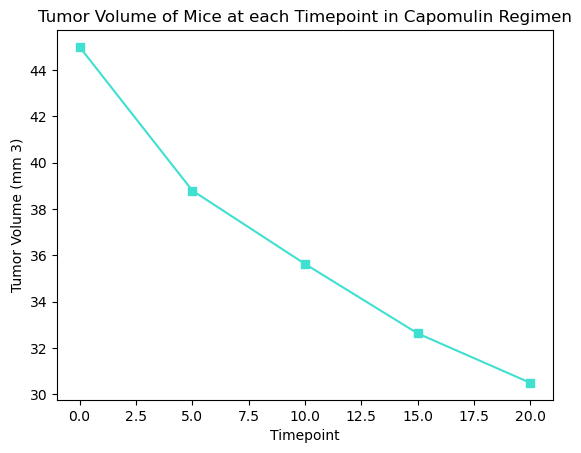

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capo_timepoint = clean_duplicate_df.loc[clean_duplicate_df["Mouse ID"]=="f966","Timepoint"]
mouse_capo_tumorvol = clean_duplicate_df.loc[clean_duplicate_df["Mouse ID"]=="f966", "Tumor Volume (mm3)"]

plt.plot(mouse_capo_timepoint, mouse_capo_tumorvol, color = "Turquoise", marker ="s")
plt.title ("Tumor Volume of Mice at each Timepoint in Capomulin Regimen")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm 3)")



Text(0, 0.5, 'Average Tumor Volume (mm 3')

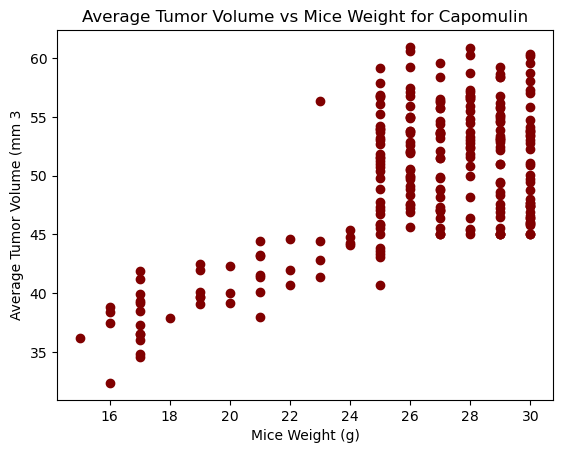

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
averageplot = clean_duplicate_df.groupby(['Mouse ID']).mean()
#averageplot

plt.scatter(averageplot["Weight (g)"], averageplot["Tumor Volume (mm3)"], color = "Maroon")
plt.title("Average Tumor Volume vs Mice Weight for Capomulin")
plt.xlabel("Mice Weight (g)")
plt.ylabel("Average Tumor Volume (mm 3")


## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation_coef = round(st.pearsonr(averageplot['Weight (g)'],averageplot['Tumor Volume (mm3)'])[0],2)

#This is in relation to Capompdulin
slope, y_int, r_value, p_value, stdev= st.linregress(averageplot['Weight (g)'], averageplot['Tumor Volume (mm3)'])
capo_slope = round(slope,2)
capo_y_int = round(y_int, 2)
capo_equation = f'y = {capo_slope}x + {capo_y_int}'
capo_line_fit = averageplot['Weight (g)']*slope + y_int
print(f'The Correlation Coefficient for Mouse Weight and Average Tumor Volume while on Capomodulin is {correlation_coef}')


The Correlation Coefficient for Mouse Weight and Average Tumor Volume while on Capomodulin is 0.66


<function matplotlib.pyplot.legend(*args, **kwargs)>

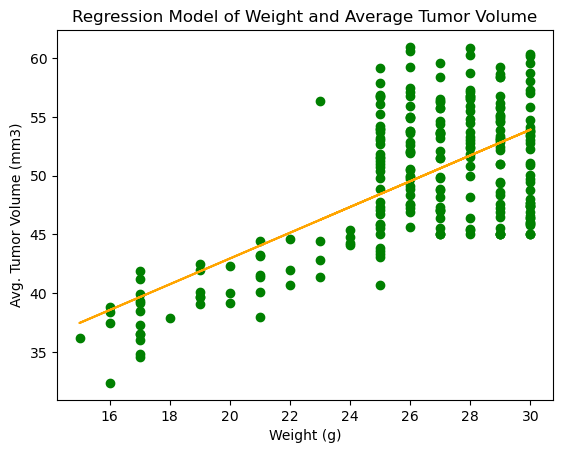

In [49]:
plt.scatter(averageplot["Weight (g)"], averageplot["Tumor Volume (mm3)"], color = "green")
plt.plot(averageplot["Weight (g)"],capo_line_fit, color = "orange", label = capo_equation)
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.title("Regression Model of Weight and Average Tumor Volume")
plt.legend